<a href="https://colab.research.google.com/github/baochuong/Articial-Intelligence-AI-/blob/main/cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import cifar100
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

So nay la: [86]


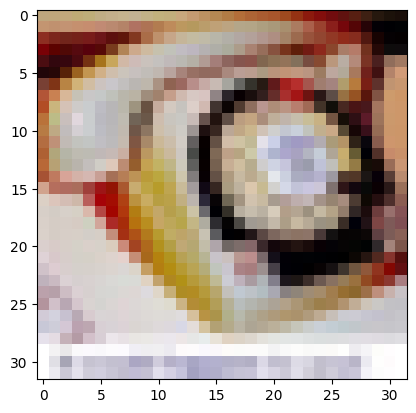

In [13]:
import matplotlib.pyplot as plt
hinh= x_train[5]   #Lấy hình ở vị trí thứ 55
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[5])

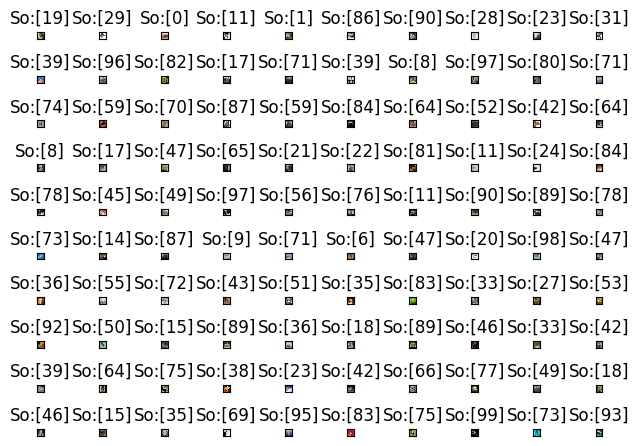

In [14]:
for i in range(100):
  plt.subplot(10,10,i+1)   
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(100,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [16]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [17]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 100) 
y_test = to_categorical(y_test, 100)

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, học tổng cộng 10 lần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
391/391 [==============================] - 9s 21ms/step - loss: 4.2573 - accuracy: 0.0699
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 3.8124 - accuracy: 0.1209
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 3.6686 - accuracy: 0.1494
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 3.5757 - accuracy: 0.1650
Epoch 5/10
391/391 [==============================] - 8s 21ms/step - loss: 3.5076 - accuracy: 0.1794
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 3.4553 - accuracy: 0.1900
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 3.4021 - accuracy: 0.2000
Epoch 8/10
391/391 [==============================] - 8s 21ms/step - loss: 3.3612 - accuracy: 0.2062
Epoch 9/10
391/391 [==============================] - 9s 22ms/step - loss: 3.3271 - accuracy: 0.2110
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 3.5317 - accurac

In [20]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar100.h5')

In [21]:
model.save('model_cifar100.h5')